# Boat Sales Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('boat_data.csv')

In [3]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58


In [4]:
df['Unit'] = df['Price'].str.slice(0,3)
df['Price'] = df['Price'].str.slice(4,8)

In [5]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Unit
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226,CHF
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,EUR
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124,CHF
3,2590,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64,DKK
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,EUR


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
 10  Unit                         9888 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 849.9+ KB


In [7]:
df.describe()

,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9879.000000,9832.000000,9888.000000
mean,1893.192860,11.570017,3.520124,149.160801
std,460.201582,6.002820,1.220534,151.819752
min,0.000000,1.040000,0.010000,13.000000
25%,1996.000000,7.470000,2.540000,70.000000
50%,2007.000000,10.280000,3.330000,108.000000
75%,2017.000000,13.930000,4.250000,172.000000
max,2021.000000,100.000000,25.160000,3263.000000


In [8]:
df.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
Unit                              0
dtype: int64

In [9]:
df.replace(0,np.nan, inplace=True)

In [10]:
df['Unit'].unique()

array(['CHF', 'EUR', 'DKK', 'Â£ '], dtype=object)

In [11]:
df['Unit'] = df['Unit'].replace('Â£ ', '£')

In [12]:
df.query("Unit == '£'")

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Unit
41,170,Working Boat,Buster power boats,new boat from stock,2019.0,3.88,1.49,NaN,United,54,£
72,000,"Cabin Boat,Classic",NaN,"Used boat,Unleaded",1941.0,8.23,2.65,Wood,United,154,£
235,3995,Cabin Boat,Atlanta power boats,Used boat,NaN,7.37,1.85,NaN,United,140,£
237,4950,Center console boat,Buster power boats,new boat from stock,2018.0,4.57,1.83,NaN,United,53,£
557,7250,Pilothouse,Ocqueteau power boats,new boat from stock,2018.0,5.89,2.44,NaN,United,66,£
...,...,...,...,...,...,...,...,...,...,...,...
9424,5500,Pilothouse,NaN,"Used boat,Diesel",1976.0,7.21,2.13,NaN,United,62,£
9487,4500,Cabin Boat,Hardy Marine power boats,Used boat,1988.0,8.00,2.74,NaN,United,75,£
9603,1995,Sport Boat,Sea Ray power boats,Used boat,1989.0,6.71,2.59,PVC,United,205,£
9604,1950,Cabin Boat,Bayliner power boats,Used boat,1986.0,7.92,0.74,NaN,United,203,£


In [13]:
df['Price'] = df['Price'].astype(int)

In [14]:
chf_df = df.query("Unit == 'CHF'").copy()
dkk_df = df.query("Unit == 'DKK'").copy()
liv_df = df.query("Unit == '£'").copy()

In [15]:
chf_df['Price'] = round(chf_df['Price'] * 1.03).astype(int)

In [16]:
dkk_df['Price'] = round(dkk_df['Price'] * 0.13).astype(int)

In [17]:
liv_df['Price'] = round(liv_df['Price'] * 1.19).astype(int)

In [18]:
df = df.drop(index = chf_df.index)

In [19]:
df = df.drop(index = dkk_df.index)

In [20]:
df = df.drop(index = liv_df.index)

In [21]:
df = pd.concat([chf_df, dkk_df, liv_df], ignore_index = True)

In [22]:
df.Price.dropna(inplace=True)

In [23]:
df.Unit = 'EUR'
df.Price = df.Price.astype(int)
df.Price.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1458 entries, 0 to 1457
Series name: Price
Non-Null Count  Dtype
--------------  -----
1458 non-null   int32
dtypes: int32(1)
memory usage: 5.8 KB


In [24]:
df['Year Built'] = round(df['Year Built']).astype("Int64")

In [25]:
df.Material.unique()

array([nan, 'Aluminium', 'GRP', 'Thermoplastic', 'Plastic', 'Wood',
       'Steel', 'Hypalon', 'Carbon Fiber', 'PVC'], dtype=object)

In [26]:
mode = df.Material.mode()
mode[0]

'GRP'

In [27]:
df['Material'].fillna(mode[0], inplace = True)
df.Material.replace(to_replace=['nan'], value=mode, inplace=True)

In [28]:
df.Material.isnull().sum()

0

In [29]:
df.Material.unique()

array(['GRP', 'Aluminium', 'Thermoplastic', 'Plastic', 'Wood', 'Steel',
       'Hypalon', 'Carbon Fiber', 'PVC'], dtype=object)

In [30]:
df.Type.unique()

array(['new boat from stock', 'Used boat,Unleaded', 'Used boat,Electric',
       'new boat from stock,Unleaded', 'Used boat', 'new boat on order',
       'new boat on order,Unleaded', 'Display Model,Unleaded',
       'Used boat,Diesel', 'Display Model',
       'new boat from stock,Electric', nan, 'new boat from stock,Diesel',
       'Display Model,Diesel', 'new boat on order,Diesel',
       'Display Model,Electric', 'Diesel', 'Unleaded'], dtype=object)

In [31]:
df.Type.isnull().sum()

4

In [32]:
mode = df.Type.mode()
mode = df.Type.fillna(mode[0], inplace= True)
#df.Type = df.Type.astype(str)
#df.Type.replace(to_replace=['nan'], value=mode, inplace=True)

In [33]:
df.Type.isnull().sum()

0

In [34]:
df['Price'] = df['Price'].astype('Int64')

In [35]:
df.isnull().sum()

Price                            0
Boat Type                        0
Manufacturer                    70
Type                             0
Year Built                     127
Length                           3
Width                            7
Material                         0
Location                         3
Number of views last 7 days      0
Unit                             0
dtype: int64

In [36]:
df.reset_index(drop = True)

df.Type.unique()

array(['new boat from stock', 'Used boat,Unleaded', 'Used boat,Electric',
       'new boat from stock,Unleaded', 'Used boat', 'new boat on order',
       'new boat on order,Unleaded', 'Display Model,Unleaded',
       'Used boat,Diesel', 'Display Model',
       'new boat from stock,Electric', 'new boat from stock,Diesel',
       'Display Model,Diesel', 'new boat on order,Diesel',
       'Display Model,Electric', 'Diesel', 'Unleaded'], dtype=object)

# Visualization

### Is it the most expensive boats that get the most views ?

In [37]:
df['Number of views last 7 days'].max()

3263

In [38]:
qt75 = df.Price.quantile(.75)
high_prc = df[df['Price'] > qt75]
low_prc = df[df['Price'] < qt75]

In [39]:
high_view= df['Number of views last 7 days'].quantile(.75)
high_view_df = df[df['Number of views last 7 days'] > high_view].copy()

In [40]:
high_low = pd.DataFrame({'Expensive Boats' : high_prc['Number of views last 7 days'], 'Cheap Boats' : low_prc['Number of views last 7 days']})

In [41]:
high_low = high_low.sum().astype(int)

In [42]:
high_low

Expensive Boats     94513
Cheap Boats        304198
dtype: int32

(array([0, 1]), [Text(0, 0, 'Expensive Boats'), Text(1, 0, 'Cheap Boats')])

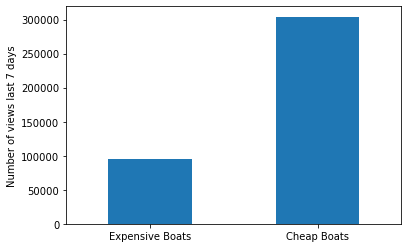

In [43]:
high_low.plot(kind='bar')
plt.ylabel('Number of views last 7 days')
plt.xticks(rotation=0)


In [44]:
high_prc['Number of views last 7 days'].sum()

94513

In [45]:
low_prc['Number of views last 7 days'].sum()

304198

In [46]:
high_view_df.Material.unique()
high_view_df.Material

3           Aluminium
7           Aluminium
9           Aluminium
14                GRP
15      Thermoplastic
            ...      
1154              GRP
1251              GRP
1260              GRP
1263              GRP
1264              GRP
Name: Material, Length: 365, dtype: object

<AxesSubplot:>

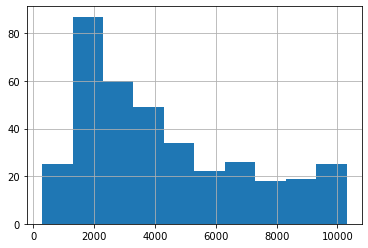

In [47]:
high_view_df.Price.hist()

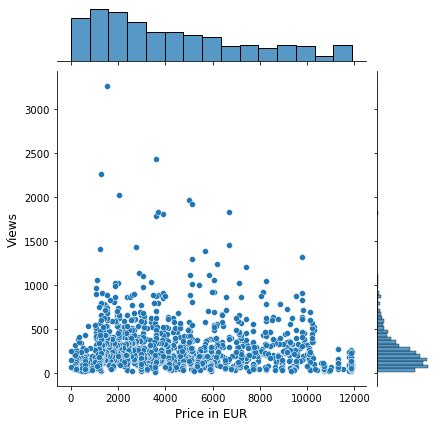

In [48]:
ax = sns.jointplot(y='Number of views last 7 days', x='Price', data=df)
ax.set_axis_labels('Price in EUR', 'Views', fontsize=12)
plt.show()

**Boats with lower price tends to have more views than expensive ones**

### Are there common features among the most viewed boats ?

In [49]:
high_view_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 3 to 1264
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        365 non-null    Int64  
 1   Boat Type                    365 non-null    object 
 2   Manufacturer                 353 non-null    object 
 3   Type                         365 non-null    object 
 4   Year Built                   349 non-null    Int64  
 5   Length                       363 non-null    float64
 6   Width                        363 non-null    float64
 7   Material                     365 non-null    object 
 8   Location                     365 non-null    object 
 9   Number of views last 7 days  365 non-null    int64  
 10  Unit                         365 non-null    object 
dtypes: Int64(2), float64(2), int64(1), object(6)
memory usage: 34.9+ KB


In [50]:
import itertools
def concat(ch):
    return list(itertools.chain.from_iterable(ch.str.split(',')))

In [51]:
high_view_df['Type'] = high_view_df['Type'].astype(str)
lengths1 = high_view_df['Type'].str.split(',').map(len)
# Creating a new dataframe with the new splitted rows
high_view_df = pd.DataFrame({'Price' : np.repeat(high_view_df['Price'], lengths1),
                                                   'Type' : concat(high_view_df['Type']),
                                                   'Number of views last 7 days' : np.repeat(high_view_df['Number of views last 7 days'], lengths1),
                         'Boat Type': np.repeat(high_view_df['Boat Type'], lengths1),
                         'Material': np.repeat(high_view_df['Material'], lengths1),
                         'Location' : np.repeat(high_view_df['Location'], lengths1)})

In [52]:
lengths1 = high_view_df['Boat Type'].str.split(',').map(len)
# Creating a new dataframe with the new splitted rows
high_view_df = pd.DataFrame({'Price' : np.repeat(high_view_df['Price'], lengths1),
                                                   'Type' : np.repeat(high_view_df['Type'], lengths1),
                                                   'Number of views last 7 days' : np.repeat(high_view_df['Number of views last 7 days'], lengths1),
                         'Boat Type': concat(high_view_df['Boat Type']),
                         'Material': np.repeat(high_view_df['Material'], lengths1),
                         'Location' : np.repeat(high_view_df['Location'], lengths1)})

In [53]:
high_view_df.Type.unique()

array(['Used boat', 'Unleaded', 'new boat from stock',
       'new boat on order', 'Display Model', 'Diesel', 'Electric'],
      dtype=object)

Text(0.5, 1.0, 'Views Per Type')

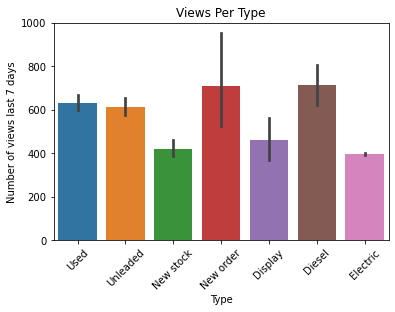

In [54]:
fig, ax = plt.subplots()
chart = sns.barplot(ax = ax, y='Number of views last 7 days', x='Type', data=high_view_df)
ax.set_xticklabels(['Used','Unleaded','New stock','New order','Display','Diesel','Electric'])
xtix = ax.get_xticks()
plt.xticks(rotation=45)
plt.title('Views Per Type')

In [55]:
high_view_df['Boat Type'].unique()

array(['Catamaran', 'Fishing Boat', 'Sport Boat', 'Cabin Boat',
       'Bowrider', 'Pilothouse', 'Working Boat', 'Pontoon Boat',
       'Water ski', 'Runabout', 'Hardtop', 'Offshore Boat', 'Classic',
       'Wakeboard/Wakesurf', 'Motor Yacht', 'House Boat', 'Flybridge',
       'Trawler', 'Deck Boat', 'Center console boat', 'Passenger boat'],
      dtype=object)

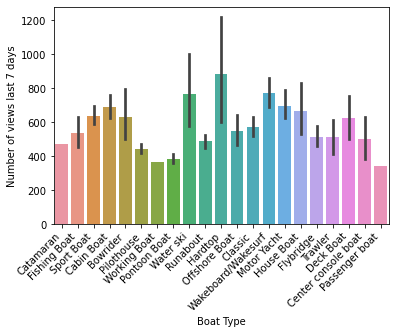

<Figure size 864x432 with 0 Axes>

In [56]:
fig, ax = plt.subplots()
chart = sns.barplot(ax = ax, y='Number of views last 7 days', x='Boat Type', data=high_view_df)
plt.xticks(rotation=45)
plt.figure(figsize=(12, 6))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [57]:
top_manu = df.sort_values('Number of views last 7 days', ascending=False)[['Manufacturer','Number of views last 7 days']].head(10)

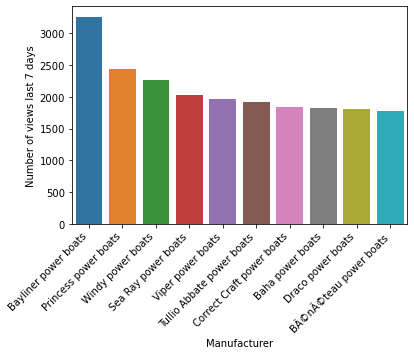

<Figure size 864x432 with 0 Axes>

In [58]:
fig, ax = plt.subplots()
chart = sns.barplot(y='Number of views last 7 days', x='Manufacturer', data=top_manu)
plt.xticks(rotation=45)
plt.figure(figsize=(12, 6))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

[Text(0, 0, 'Switzerland'),
 Text(1, 0, 'Lake'),
 Text(2, 0, 'France'),
 Text(3, 0, 'Faoug'),
 Text(4, 0, 'Avenches'),
 Text(5, 0, 'ZÃ¼richse,'),
 Text(6, 0, 'Tenero,'),
 Text(7, 0, 'VierwaldstÃ¤ttersee'),
 Text(8, 0, 'Lago'),
 Text(9, 0, 'Thalwil'),
 Text(10, 0, 'Welschenrohr'),
 Text(11, 0, 'Thun'),
 Text(12, 0, 'Denmark'),
 Text(13, 0, 'PT'),
 Text(14, 0, 'Juelsminde'),
 Text(15, 0, 'Italy'),
 Text(16, 0, 'United'),
 Text(17, 0, 'Spain')]

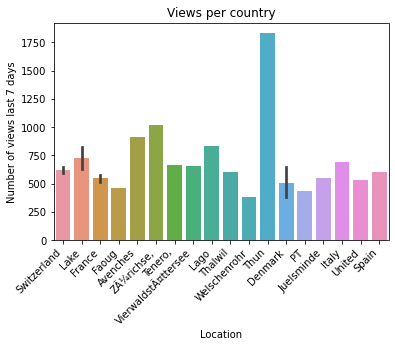

<Figure size 864x432 with 0 Axes>

In [60]:
fig, ax = plt.subplots()
chart = sns.barplot(y='Number of views last 7 days', x='Location', data=high_view_df)
chart.set(title='Views per country')
plt.xticks(rotation=45)
plt.figure(figsize=(12, 6))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [ ]:
pie_df = pd.DataFrame(high_view_df.groupby('Material')['Number of views last 7 days'].sum())

In [ ]:
pie_df

In [ ]:
plt.rcParams['text.color'] = 'white'
plt.rcParams['font.size'] = 10
plt.pie(pie_df['Number of views last 7 days'], labels=pie_df.index,explode=(0, 0.7, 0, 0, 0.5,0.5,0) ,shadow=True)
plt.show()